## 2차 과제

- 주제: 데이터 크롤링을 활용한 뉴스 & 리뷰 데이터 분석
- 데이터: 자유롭게 크롤링
- 사용 라이브러리: selenium, beautifulsoup, etc.

### 1. 뉴스 기사 데이터 크롤링

1.1 원하는 뉴스 기사의 본문을 크롤링하시오.

In [35]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

In [36]:
url='https://n.news.naver.com/article/293/0000052601'
res=requests.get(url)
res.raise_for_status()

In [37]:
soup=BeautifulSoup(res.text,'lxml')
print((soup.title.get_text()))
new_body=soup.find('article').get_text().strip()
print(new_body)

알리, 쿠팡에 대적할 수 있을까?  "알리 3년간 1.5조원 vs 쿠팡 10년간 6.2조원"
중국 알리바바그룹이 한국 시장에 3년간 1조 5000억원을 투자하기로 하면서 향후 쿠팡의 아성을 뛰어넘을 수 있을지 업계의 관심이 쏠리고 있다. 사진은 마윈 알리바바그룹 명예회장.(출처=블로터DB) "알리는 쿠팡에 대적할 수 있을까?"중국 알리바바그룹이 이커머스 자회사 알리익스프레스(이하 알리)의 한국 사업 확대를 위해 3년간 1조 5000억원 규모의 투자를 진행한다는 계획을 밝힌 가운데, 알리가 국내 유통공룡으로 거듭난 쿠팡의 아성을 뛰어넘을 수 있을지 업계의 관심이 쏠리고 있다. 앞서 쿠팡이 10년간 6조 2000억원의 대규모 투자를 단행해 국내 이커머스 시장을 선점했다는 점에서  알리가 이번 투자를 통해 당장 판도를 바꾸긴 어렵지만 투자가 지속된다면 국내 온라인 쇼핑 시장이 '알리-쿠팡 체제'로 양분될 수도 있다는 관측도 나온다. 알리, 3년 간 약 1조 5000억원 투자, 대규모 통합물류센터 구축15일 업계에 따르면 알리바바는 3년간 11억달러(약 1조 4471억원)을 투자한다는 내용의 사업계획서를 정부에 제출했다. 구체적으로 2억달러를 투자해 올해 안에 국내에 18만㎡(약 5만 4450평) 규모의 통합물류센터를 구축하고, 한국 셀러의 글로벌 판로 지원에 1억 달러, 소비자 보호에 1000억원, 지재권 보호에도 100억원을 투입한다는 내용이 담겼다. 특히 알리가 구축하려는 통합물류센터는 크기가 축구장 25개에 달해 단일 시설로는 국내에서 가장 클 것으로 전망된다.알리바바가 국내 투자에 나서는 이유는 한국 소비자들이 높은 구매력을 갖춘 것은 물론, 전국 단위의 택배망이 고르게 퍼져있어 이커머스 업체에겐 매력적인 시장으로 느껴지기 때문이다. 2018년 한국에 진출한 알리는 지난해부터 본격적으로 시장 공략에 나서고 있다. 최근에는 해외 직구를 넘어 한국 브랜드관인 'K베뉴'를 통해 신선식품까지 카테고리를 확장하고, 국내 1위 식품 업체 CJ제일제당과 손을 잡는 등 사

1.2 크롤링한 본문을 단어 단위로 나누고 각 단어가 나온 횟수와 함께 dataframe 형식으로 변환하시오.

In [38]:
words = new_body.split()
word_counts = Counter(words)
df = pd.DataFrame(word_counts.items(), columns=['단어', '횟수'])
df = df.sort_values(by='횟수', ascending=False)
print(df)

          단어  횟수
42        국내  10
2         한국   8
33        위해   6
5         1조   6
10       쿠팡의   6
..       ...  ..
170  CJ제일제당과   1
169       업체   1
167       1위   1
166    확장하고,   1
431  어불성설"라고   1

[432 rows x 2 columns]


1.3 불용어를 제거하시오.

In [103]:
import nltk
from nltk.tokenize import word_tokenize


stop_words = set([
    '은', '는', '이', '가', '을', '를', '의', '에', '와', '과', '한', '하다','것','약','위해','할 수'
])

In [104]:
def remove_stopwords(text):
    words = word_tokenize(text)
    filtered_words = [word for word in words if word not in stop_words]
    filtered_text = ' '.join(filtered_words)
    return filtered_text

In [41]:
cdf=remove_stopwords(new_body)
print(cdf)

중국 알리바바그룹이 한국 시장에 3년간 1조 5000억원을 투자하기로 하면서 향후 쿠팡의 아성을 뛰어넘을 수 있을지 업계의 관심이 쏠리고 있다 . 사진은 마윈 알리바바그룹 명예회장 . ( 출처=블로터DB ) '' 알리는 쿠팡에 대적할 수 있을까 ? `` 중국 알리바바그룹이 이커머스 자회사 알리익스프레스 ( 이하 알리 ) 한국 사업 확대를 3년간 1조 5000억원 규모의 투자를 진행한다는 계획을 밝힌 가운데 , 알리가 국내 유통공룡으로 거듭난 쿠팡의 아성을 뛰어넘을 수 있을지 업계의 관심이 쏠리고 있다 . 앞서 쿠팡이 10년간 6조 2000억원의 대규모 투자를 단행해 국내 이커머스 시장을 선점했다는 점에서 알리가 이번 투자를 통해 당장 판도를 바꾸긴 어렵지만 투자가 지속된다면 국내 온라인 쇼핑 시장이 '알리-쿠팡 체제 ' 로 양분될 수도 있다는 관측도 나온다 . 알리 , 3년 간 1조 5000억원 투자 , 대규모 통합물류센터 구축15일 업계에 따르면 알리바바는 3년간 11억달러 ( 1조 4471억원 ) 투자한다는 내용의 사업계획서를 정부에 제출했다 . 구체적으로 2억달러를 투자해 올해 안에 국내에 18만㎡ ( 5만 4450평 ) 규모의 통합물류센터를 구축하고 , 한국 셀러의 글로벌 판로 지원에 1억 달러 , 소비자 보호에 1000억원 , 지재권 보호에도 100억원을 투입한다는 내용이 담겼다 . 특히 알리가 구축하려는 통합물류센터는 크기가 축구장 25개에 달해 단일 시설로는 국내에서 가장 클 것으로 전망된다.알리바바가 국내 투자에 나서는 이유는 한국 소비자들이 높은 구매력을 갖춘 것은 물론 , 전국 단위의 택배망이 고르게 퍼져있어 이커머스 업체에겐 매력적인 시장으로 느껴지기 때문이다 . 2018년 한국에 진출한 알리는 지난해부터 본격적으로 시장 공략에 나서고 있다 . 최근에는 해외 직구를 넘어 한국 브랜드관인 'K베뉴 ' 통해 신선식품까지 카테고리를 확장하고 , 국내 1위 식품 업체 CJ제일제당과 손을 잡는 등 사세를 키우고 있다.알리의 사업 확장에 가장 큰 걸림

In [42]:
words = cdf.split()
word_counts = Counter(words)
df = pd.DataFrame(word_counts.items(), columns=['단어', '횟수'])
df = df.sort_values(by='횟수', ascending=False)

In [43]:
print(df['단어'].value_counts())
aa={'알리의': '알리', '알리는': '알리','알리바바그룹이':'알리','알리가':'알리'}
bb={'쿠팡의': '쿠팡', '쿠팡은': '쿠팡'}

df['단어']=df['단어'].replace(aa)
df['단어']=df['단어'].replace(bb)
print(df['단어'].value_counts())

단어
.        1
특히       1
구축15일    1
업계에      1
소비자      1
        ..
우선       1
잘        1
예정인      1
실탄을      1
라고       1
Name: count, Length: 434, dtype: int64
단어
알리        5
쿠팡        3
.         1
내용이       1
유통공룡으로    1
         ..
창고        1
형태에       1
그칠        1
이라면서      1
라고        1
Name: count, Length: 428, dtype: int64


1.4 처리한 데이터를 워드아트로 변환해 어떤 단어가 가장 많이 나왔는지 확인하시오(폰트, 색 등 자유).

In [44]:
from wordcloud import WordCloud
from matplotlib import font_manager as fm
from matplotlib import rc

{'알리': 1.0, '쿠팡': 0.6666666666666666, '중국': 0.3333333333333333, '있다': 0.3333333333333333, '역직구': 0.3333333333333333, '국내': 0.16666666666666666, '한국': 0.16666666666666666, '투자를': 0.16666666666666666, '1조': 0.16666666666666666, '시장': 0.16666666666666666, '대규모': 0.16666666666666666, '사업': 0.16666666666666666, '쇼핑': 0.16666666666666666, '온라인': 0.16666666666666666, '3년간': 0.16666666666666666, '이커머스': 0.16666666666666666, '따르면': 0.16666666666666666, '가장': 0.16666666666666666, '규모의': 0.16666666666666666, '5000억원': 0.16666666666666666, '수': 0.16666666666666666, '투자가': 0.16666666666666666, '관계자는': 0.16666666666666666, '제품을': 0.16666666666666666, '이번': 0.16666666666666666, '등': 0.16666666666666666, '통합물류센터': 0.16666666666666666, '소비자들이': 0.16666666666666666, '것으로': 0.16666666666666666, '통합물류센터는': 0.16666666666666666, '입지를': 0.16666666666666666, '것이라는': 0.16666666666666666, '말했다': 0.16666666666666666, '로': 0.16666666666666666, '국내에': 0.16666666666666666, '이상의': 0.16666666666666666, '나온다': 0.16666

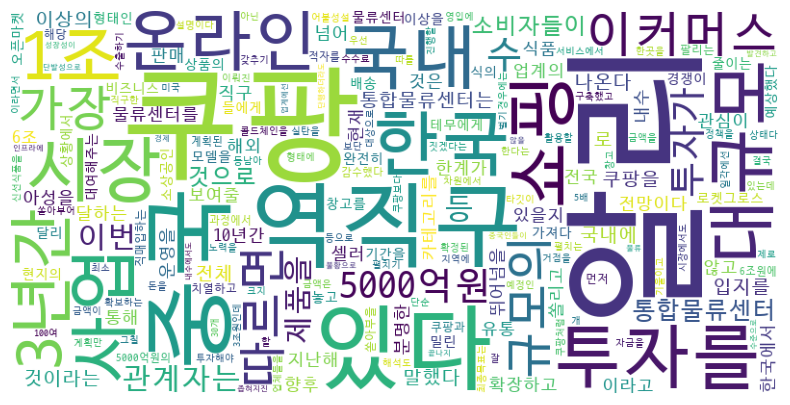

In [45]:
clean_article = ' '.join(df['단어'])
wordcloud = WordCloud(width=800, height=400, background_color='white', font_path='C:/Users/yeonn/AppData/Local/Microsoft/Windows/Fonts/D2Coding-Ver1.3.2-20180524-all.ttc').generate(clean_article)
print(wordcloud.words_)
# WordCloud 출력
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### 2. 플레이스토어 리뷰 데이터 크롤링(동적 크롤링)

2.1 100개 이상의 리뷰를 가진 앱에 있는 댓글 리뷰를 크롤링하시오.

In [46]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
import time

2.2 크롤링한 데이터를 dataframe 형태로 변환하시오(날짜, 별점, 리뷰 유저 등).

In [47]:
browser = webdriver.Chrome()
url='https://play.google.com/store/apps/details?id=com.alibaba.aliexpresshd&hl=ko-KR'
browser.get(url)
browser.execute_script("window.scrollTo(0, document.body.scrollHeight);")
spread_review = browser.find_element(by=By.XPATH, value = '//*[@id="yDmH0d"]/c-wiz[2]/div/div/div[1]/div/div[2]/div/div[1]/div[1]/c-wiz[5]/section/div/div[2]/div[5]/div/div/button')
if True :
    browser.execute_script("arguments[0].click();", spread_review)
    time.sleep(1.5)

In [48]:
all_reviews = browser.find_element(by=By.XPATH, value ='//*[@id="yDmH0d"]/div[4]/div[2]/div/div/div/div/div[2]')
for i in range(40):
    browser.execute_script('arguments[0].scrollTop = arguments[0].scrollHeight', all_reviews)
    time.sleep(1.5)

In [49]:
comments = pd.DataFrame(data=[], columns=['날짜','리뷰','별점'])
#날짜, 리뷰, 별점 수집
dates = browser.find_elements(by=By.XPATH, value = '//span[@class="bp9Aid"]')
reviews=browser.find_elements(by=By.XPATH, value = '//div[@class="h3YV2d"]')
stargrades = browser.find_elements(by=By.XPATH, value = '//div[@class="iXRFPc"]')

# k개의 리뷰를 수집합니다.
for i in range(len(reviews)):
    tmp = []
    tmp.append(dates[i].text)
    tmp.append(reviews[i].text)
    tmp.append(stargrades[i].get_attribute('aria-label'))

    tmp = pd.DataFrame(data=[tmp], columns = data.columns)
    comments = pd.concat([data,tmp])
    

comments.reset_index(inplace=True, drop=True)
comments

,날짜,리뷰,별점
0,,,별표 5개 만점에 3개를 받았습니다.
1,,,별표 5개 만점에 5개를 받았습니다.
2,,,별표 5개 만점에 4개를 받았습니다.
3,2024년 2월 23일,장점 1. 없는게 없을정도로 다양한 상품 취급 2. 진짜 이가격이 맞나 싶을정도로 ...,별표 5개 만점에 3개를 받았습니다.
4,2024년 1월 6일,상품 검색 기능은 좀더 개선했으면 좋겠습니다. 낮은 가격 순으로 또는 높은 가격 순...,별표 5개 만점에 5개를 받았습니다.
...,...,...,...
4431,2024년 1월 25일,소비자로서 대만족한 쇼핑 앱입니다 적극 추천합니다.,별표 5개 만점에 5개를 받았습니다.
4432,2024년 1월 5일,배송에 시간은 걸리지만 잘 고르면 좋은 것 걸려들어요,별표 5개 만점에 4개를 받았습니다.
4433,2024년 2월 13일,좋은 상품을 저렴하게 판매하고 배송도 빨라요.,별표 5개 만점에 5개를 받았습니다.
4434,2024년 2월 10일,배달도 빠르고요 퀄리티도좋아요,별표 5개 만점에 5개를 받았습니다.


2.3 긍정 리뷰와 부정 리뷰를 나누시오(기준은 자유).

In [52]:
comments['별점'] = comments['별점'].apply(lambda x: x[10:11])

In [54]:
comments['별점'] = comments['별점'].apply(lambda x: int(x))

In [57]:
comments

,날짜,리뷰,별점
0,,,3
1,,,5
2,,,4
3,2024년 2월 23일,장점 1. 없는게 없을정도로 다양한 상품 취급 2. 진짜 이가격이 맞나 싶을정도로 ...,3
4,2024년 1월 6일,상품 검색 기능은 좀더 개선했으면 좋겠습니다. 낮은 가격 순으로 또는 높은 가격 순...,5
...,...,...,...
4431,2024년 1월 25일,소비자로서 대만족한 쇼핑 앱입니다 적극 추천합니다.,5
4432,2024년 1월 5일,배송에 시간은 걸리지만 잘 고르면 좋은 것 걸려들어요,4
4433,2024년 2월 13일,좋은 상품을 저렴하게 판매하고 배송도 빨라요.,5
4434,2024년 2월 10일,배달도 빠르고요 퀄리티도좋아요,5


In [69]:
comments['리뷰_긍정']=comments['별점'][comments['별점']>=4]
comments['리뷰_부정']=comments['별점'][comments['별점']<4]

In [71]:
comments

,날짜,리뷰,별점,리뷰_긍정,리뷰_부정
0,,,3,NaN,3.0
1,,,5,5.0,NaN
2,,,4,4.0,NaN
3,2024년 2월 23일,장점 1. 없는게 없을정도로 다양한 상품 취급 2. 진짜 이가격이 맞나 싶을정도로 ...,3,NaN,3.0
4,2024년 1월 6일,상품 검색 기능은 좀더 개선했으면 좋겠습니다. 낮은 가격 순으로 또는 높은 가격 순...,5,5.0,NaN
...,...,...,...,...,...
4431,2024년 1월 25일,소비자로서 대만족한 쇼핑 앱입니다 적극 추천합니다.,5,5.0,NaN
4432,2024년 1월 5일,배송에 시간은 걸리지만 잘 고르면 좋은 것 걸려들어요,4,4.0,NaN
4433,2024년 2월 13일,좋은 상품을 저렴하게 판매하고 배송도 빨라요.,5,5.0,NaN
4434,2024년 2월 10일,배달도 빠르고요 퀄리티도좋아요,5,5.0,NaN


In [83]:
good_reviews=comments.dropna(subset=['리뷰_긍정'])
poor_reviews=comments.dropna(subset=['리뷰_부정'])

In [86]:
good_reviews=good_reviews['리뷰']
good_reviews

1                                                        
2                                                        
4       상품 검색 기능은 좀더 개선했으면 좋겠습니다. 낮은 가격 순으로 또는 높은 가격 순...
5       너무 좋은 앱이지만 가끔씩 결제오류가 뜨는 경우가 있습니다한 이것에 대한 해결책이 ...
12      제품판매비용이 저렴하며 사용방법도 간단하여 여러모로 만족하고 있어요. 제품 품질도 ...
                              ...                        
4431                         소비자로서 대만족한 쇼핑 앱입니다 적극 추천합니다.
4432                        배송에 시간은 걸리지만 잘 고르면 좋은 것 걸려들어요
4433                            좋은 상품을 저렴하게 판매하고 배송도 빨라요.
4434                                     배달도 빠르고요 퀄리티도좋아요
4435     물건을 고르는 안목이 무엇보다 필요하지만 잘만 고르면 가격도 좋고 없는 제품이 없네요~
Name: 리뷰, Length: 2775, dtype: object

In [87]:
poor_reviews=poor_reviews['리뷰']
poor_reviews

0                                                        
3       장점 1. 없는게 없을정도로 다양한 상품 취급 2. 진짜 이가격이 맞나 싶을정도로 ...
6       투명한 거래를 위해 더 노력해 주세요. 과장 광고가 많고 제품의 품질이 형편없는데 ...
7       검색하면 내가 입력한 키워드와는 다른 상품이 나오거나 상관없는 상품이 검색됩니다. ...
8       장바구니 결제 실패 시, 장바구니 복원 기능좀 만드세요. 20가지 상품을 사려고 결...
                              ...                        
4409    서비스센터를 한국어지원이라 해놓고 번역기 쳐 돌리고있네. 상품 파손되서 와서 반품 ...
4410                       한국의 다이소같은 느낌..환불이 번거로운거 빼곤 좋네요
4417                               제품이 사진과다르고파손이 많아좀 아쉬워요
4423               싸고 저렴 한것도 있지만 사기꾼들도 많다 반품?환불은 꿈도 꾸지마라!
4427               배송이 늦어요 묶음배송으로 정리해서 오면좋겠어요 누락대는상품 생겨요.
Name: 리뷰, Length: 1661, dtype: object

### 3. 자유 분석

3.1 위에서 크롤링한 데이터들을 활용해 자유롭게 인사이트를 도출하시오.

In [90]:
good = ' '.join(good_reviews)
poor =' '.join(poor_reviews)

In [105]:
good=remove_stopwords(good)
poor=remove_stopwords(poor)

{'배송도 빠르고': 1.0, '저렴한 가격에': 0.8157894736842105, '좋은 제품': 0.6052631578947368, '가성비 좋은': 0.5921052631578947, '배송 빠르고': 0.5131578947368421, '할 수': 0.47368421052631576, '구매할 수': 0.4342105263157895, '좋아요 배송도': 0.3684210526315789, '수 있어': 0.34210526315789475, '거의 다': 0.32894736842105265, '가격이 저렴해서': 0.32894736842105265, '좋아요 근데': 0.3026315789473684, '좋은 제품도': 0.3026315789473684, '많아서 좋아요': 0.27631578947368424, '저렴해서 좋아요': 0.27631578947368424, '가격 순으로': 0.2631578947368421, '가격도 저렴하고': 0.2631578947368421, '수도 있습니다': 0.2631578947368421, '배송이 너무': 0.23684210526315788, '가성비 좋고': 0.23684210526315788, '저렴한 가격': 0.23684210526315788, '배송은 좀': 0.23684210526315788, '잘만 고르면': 0.21052631578947367, '너무 좋은': 0.19736842105263158, '좀 오래': 0.19736842105263158, '다른건 다': 0.19736842105263158, '너무 좋습니다': 0.19736842105263158, '상품이 저렴해서': 0.19736842105263158, '가격이 싸서': 0.19736842105263158, '다양한 제품을': 0.19736842105263158, '배송은 조금': 0.19736842105263158, '좋은 물건도': 0.19736842105263158, '배송도 만족합니다': 0.19736842105263158,

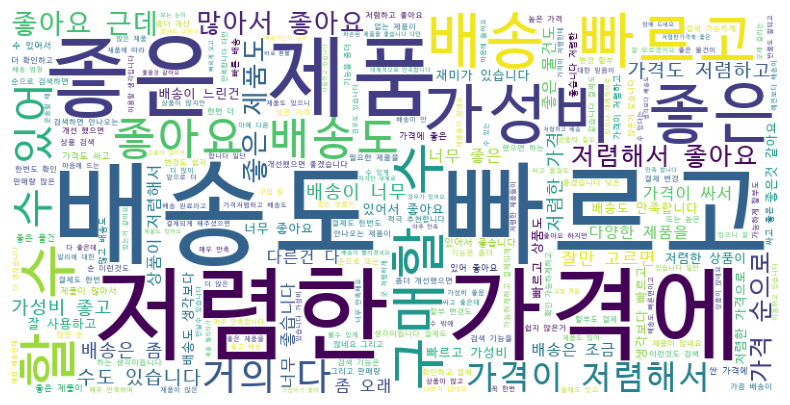

In [107]:
good_wordcloud = WordCloud(width=800, height=400, background_color='white', font_path='C:/Users/yeonn/AppData/Local/Microsoft/Windows/Fonts/D2Coding-Ver1.3.2-20180524-all.ttc').generate(good)
print(good_wordcloud.words_)
# WordCloud 출력
plt.figure(figsize=(10, 5))
plt.imshow(good_wordcloud)
plt.axis('off')
plt.show()

{'환불도 안되고': 1.0, '할 수': 0.8695652173913043, '별 한개도': 0.8695652173913043, '제대로 된': 0.782608695652174, '좋지 않은': 0.6521739130434783, '수 없는': 0.6521739130434783, '예상 배송일이': 0.6521739130434783, '예상 배송일보다': 0.6521739130434783, '백그라운드 데이터': 0.6521739130434783, '광고가 뜨서': 0.6521739130434783, '배송이 너무': 0.6521739130434783, '어떤 제품은': 0.6521739130434783, '한달 넘게': 0.6521739130434783, '경우가 많음': 0.6521739130434783, '주문 취소': 0.6521739130434783, '반품 교환': 0.6521739130434783, '저렴한 가격': 0.43478260869565216, '저렴하고 좋은': 0.43478260869565216, '않은 제품이': 0.43478260869565216, '수 있어서': 0.43478260869565216, '말도 안되는': 0.43478260869565216, '20가지 상품을': 0.43478260869565216, '너무 어이가': 0.43478260869565216, '어이가 없네요': 0.43478260869565216, '절대 사면': 0.43478260869565216, '배송비가 더': 0.43478260869565216, '너무 많은': 0.43478260869565216, '많은 실망을': 0.43478260869565216, '어려움이 있습니다': 0.43478260869565216, '가성비 좋은': 0.43478260869565216, '좀 많이': 0.43478260869565216, '어떨 때는': 0.43478260869565216, '기다리는 시간이': 0.43478260869565216, '안 오고': 0

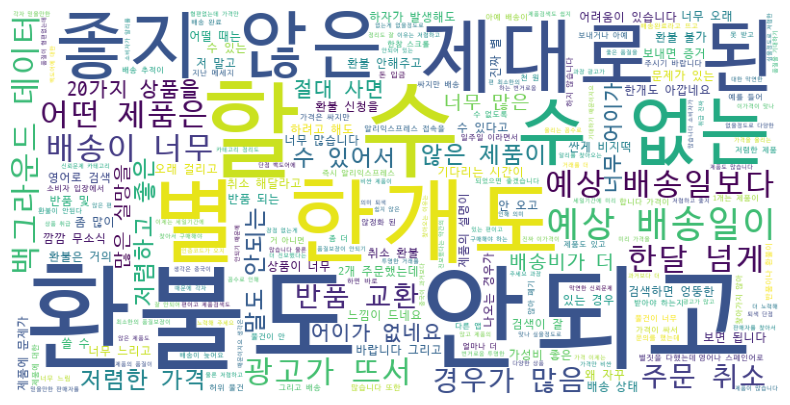

In [108]:
poor_wordcloud = WordCloud(width=800, height=400, background_color='white', font_path='C:/Users/yeonn/AppData/Local/Microsoft/Windows/Fonts/D2Coding-Ver1.3.2-20180524-all.ttc').generate(poor)
print(poor_wordcloud.words_)
# WordCloud 출력
plt.figure(figsize=(10, 5))
plt.imshow(poor_wordcloud)
plt.axis('off')
plt.show()

 '''총평:
 
긍정 리뷰에는 빠른배송,저렴한 가격이 주를 이뤘고,부정리뷰에는 지연배송가 주를 이룬것을 보아
배송 시간 유무가 제일 큰 긍/부정 을 가르는 여부라고 볼수 있고,
긍정유무에는 고객서비스에 대한 말이 없는 반면 부정 서비스에는 불편한 고객서비스(환불,광고)등의 비율이 많은것으로 보아
서비스부족이 부정리뷰에 많은 비중을 차지하고 있다고 볼수 있다'''